In [5]:
import nltk
from nltk import bigrams

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

import collections
from collections import Counter
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ghora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
corpusdir = '../text_docs/'  # point to the Directory of corpus.
your_corpus = PlaintextCorpusReader(corpusdir, '.*\.txt')

#compute the bigram model
def build_bigram_model():
    bigram_model = collections.defaultdict(
        lambda: collections.defaultdict(lambda: 0)
    )
    
    for sentence in your_corpus.sents():
        sentence = [word.lower() for word in sentence if word.isalpha()]  # get alpha only
        
        #Collect all bigrams counts for (w1,w2)
        for w1, w2 in bigrams(sentence):
            bigram_model[w1][w2] += 1

        # print('count --> ', bigram_model)
        
        #compute the probability for the bigram starting with w1
        for w1 in bigram_model:
            #total count of bigrams starting with w1
            bigram_count_4_w1 = float(sum(bigram_model[w1].values()))
            #distribute the probability mass for all bigrams starting with w1
            for w2 in bigram_model[w1]:
                bigram_model[w1][w2] /= bigram_count_4_w1
    
    return bigram_model

build_bigram_model()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ghora\AppData\Local\Temp\ipykernel_26200\1041140003.py:2: SyntaxWarning: invalid escape sequence '\.'
  your_corpus = PlaintextCorpusReader(corpusdir, '.*\.txt')


defaultdict(<function __main__.build_bigram_model.<locals>.<lambda>()>,
            {'an': defaultdict(<function __main__.build_bigram_model.<locals>.<lambda>.<locals>.<lambda>()>,
                         {'airplane': 1.5377728863112769e-13,
                          'engineer': 2.36580443686425e-14,
                          'airport': 2.36580443686425e-14,
                          'object': 2.27117231861668e-12,
                          'acceleration': 6.5523356649067e-10,
                          'initial': 0.8336591264484257,
                          'apple': 4.186224708697333e-08,
                          'a': 6.016551810869792e-20,
                          'electron': 2.6163904466660945e-09,
                          'electric': 5.232780893332189e-09,
                          'additional': 1.540237263582666e-17,
                          'average': 0.0052083346421674765,
                          'oval': 1.848284716299199e-16,
                          'intersection': 7.3

In [16]:
def predict_next_word(first_word):
    #buikd the model
    model = build_bigram_model()
    
    #get the next for the bigram starting with 'word'
    second_word = model[first_word]
    
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)


    predicted_words = list(zip(*top10words))[0]
    probability_score = list(zip(*top10words))[1]
    x_pos = np.arange(len(predicted_words))

    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, probability_score, 1)

    plt.bar(x_pos, probability_score,align='center')
    plt.xticks(x_pos, predicted_words)
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted Words')
    plt.title('Predicted words for ' + first_word)
    plt.xticks(rotation = 90)
    plt.show()

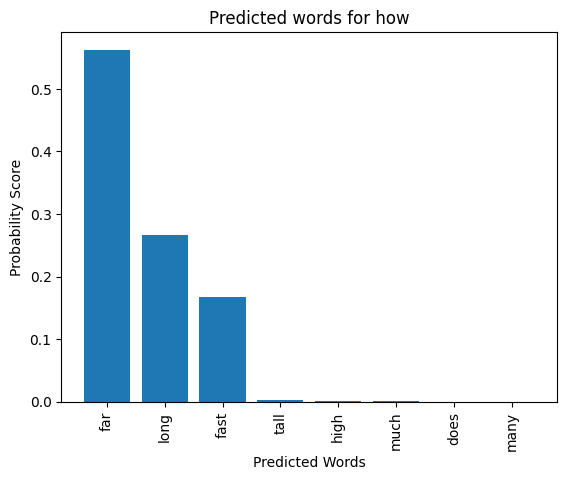

In [17]:
predict_next_word('how')

# so we pick far as the next word 

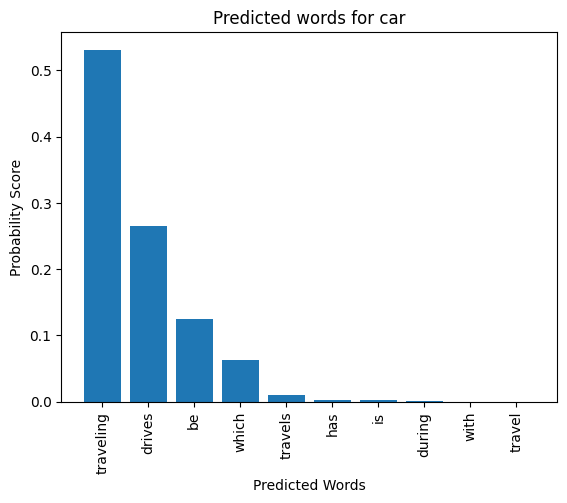

In [18]:
predict_next_word('car')